In [4]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd


In [6]:
# Replace 'path_to_your_data_file.csv' with the actual path to your Yoshops.com Sale Order file
df = pd.read_csv('orders_2016-2020_Dataset.csv')


In [7]:
# Display the first few rows of the DataFrame to get an idea of the data structure
print(df.head())

# Check the basic statistics of the numerical columns
print(df.describe())

# Check the data types and missing values in each column
print(df.info())


      Order #  Order Date and Time Stamp Fulfillment Status Payment Status  \
0  R929392577  09-11-2020 20:36:26 +0530        Unfulfilled         Unpaid   
1  R653462960  09-11-2020 20:18:26 +0530        Unfulfilled         Unpaid   
2  R226302759  09-11-2020 19:56:21 +0530        Unfulfilled         Unpaid   
3  R390235057  09-11-2020 19:37:40 +0530        Unfulfilled         Unpaid   
4  R813855117  09-11-2020 18:35:47 +0530          Cancelled           Paid   

  Payment Date and Time Stamp Fulfillment Date and Time Stamp Currency  \
0                         NaN                             NaN      INR   
1                         NaN                             NaN      INR   
2                         NaN                             NaN      INR   
3                         NaN                             NaN      INR   
4                         NaN                             NaN      INR   

   Subtotal Shipping Method Shipping Cost  ... Payment Method Tracking #  \
0  ₹ 799.0

In [8]:
# Assuming 'Order Date and Time Stamp', 'Payment Date and Time Stamp', and 'Fulfillment Date and Time Stamp' are date-time columns
date_time_columns = ['Order Date and Time Stamp', 'Payment Date and Time Stamp', 'Fulfillment Date and Time Stamp']

# Convert date-time columns to appropriate datetime data type
for col in date_time_columns:
    df[col] = pd.to_datetime(df[col])


In [9]:
# Fill missing values in specific columns with appropriate values or strategies
# For example, you can fill missing payment method with "Not Provided"
df['Payment Method'].fillna('Not Provided', inplace=True)

# Drop columns with mostly missing values (you can adjust the threshold as needed)
df.drop(columns=['Tax Method', 'Gift Cards', 'Special Instructions', 'Coupon Code', 'Coupon Code Name', 'LineItem Options', 'LineItem Add-ons'], inplace=True)

# Drop rows with missing values in 'Shipping Street Address', 'Shipping City', 'Shipping State', and 'Shipping Zip'
df.dropna(subset=['Shipping Street Address', 'Shipping City', 'Shipping State', 'Shipping Zip'], inplace=True)


In [10]:
# Assuming 'Subtotal', 'Shipping Cost', 'Taxes', 'Total', 'Discount', and 'LineItem Sale Price' are monetary columns
monetary_columns = ['Subtotal', 'Shipping Cost', 'Taxes', 'Total', 'Discount', 'LineItem Sale Price']

# Remove the currency symbol and convert to numeric data type (float)
for col in monetary_columns:
    df[col] = df[col].str.replace('₹', '').str.replace(',', '').astype(float)


In [11]:
# Assuming 'Tracking #' column is not relevant for our analysis
df.drop(columns=['Tracking #'], inplace=True)


In [14]:
#Step 2 
# 1. The shipping address differs from the billing address.
df['address_match'] = df['Shipping Street Address'] == df['Billing Street Address']
address_mismatch_cases = df[df['address_match'] == False]

In [16]:
# 2. Multiple orders of the same item.
multiple_item_orders = df[df.duplicated(subset=['LineItem Name'], keep=False)]


In [17]:
# 3. Unusually large orders.
# Determine what can be considered "unusually large" based on statistical analysis of order quantities or order amounts.
# For example, we can use the 99th percentile as a threshold for large orders.
order_quantity_threshold = df['LineItem Qty'].quantile(0.99)
unusually_large_orders = df[df['LineItem Qty'] > order_quantity_threshold]


In [18]:
# 4. Multiple orders to the same address with different payment method.
multiple_payment_orders = df[df.duplicated(subset=['Shipping Street Address'], keep=False)]

In [19]:
# 5. Unexpected international orders.
# Assuming 'Shipping Country' column contains the country information in the shipping address
expected_countries = ['Country1', 'Country2', 'Country3']  # Replace with the countries you expect most orders from
unexpected_international_orders = df[~df['Shipping Country'].isin(expected_countries)]

In [20]:
#Step 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

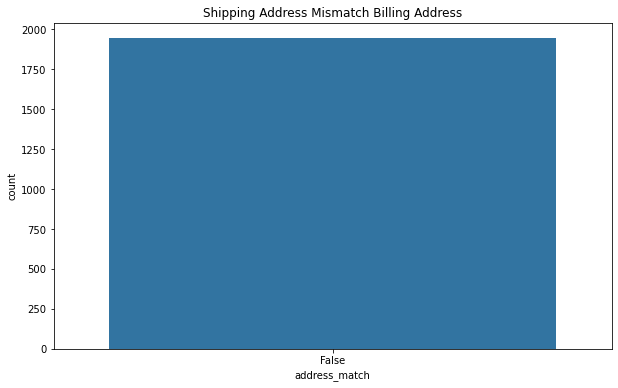

In [21]:
# Step 2: Perform Exploratory Data Analysis (EDA)
# Code for input values (1 to 5) as mentioned in the previous responses

# Step 3: Generate PDF and CSV files

# 1. Generate PDF report using matplotlib and seaborn

# Example plot for Address Mismatch Cases (Input value 1)

plt.figure(figsize=(10, 6))
sns.countplot(data=address_mismatch_cases, x='address_match')
plt.title('Shipping Address Mismatch Billing Address')
plt.savefig('address_mismatch_plot.pdf')


In [22]:
# Add more plots for other identified cases (Input values 2 to 5) using similar code structure.

# 2. Save the identified cases into separate CSV files

# Address Mismatch Cases (Input value 1)
address_mismatch_cases.to_csv('address_mismatch_cases.csv', index=False)


In [23]:
# Multiple Item Orders (Input value 2)
multiple_item_orders.to_csv('multiple_item_orders.csv', index=False)

In [24]:
# Unusually Large Orders (Input value 3)
unusually_large_orders.to_csv('unusually_large_orders.csv', index=False)


In [25]:
# Multiple Payment Orders (Input value 4)
multiple_payment_orders.to_csv('multiple_payment_orders.csv', index=False)

In [28]:
#Unexpected International Orders (Input value 5)
unexpected_international_orders.to_csv('unexpected_international_orders.csv', index=False)


In [30]:
#Step 4

# Step 2: Perform Exploratory Data Analysis (EDA)
# Code for input values (1 to 5) as mentioned in the previous responses

# Step 3: Generate PDF and CSV files
# Code for generating PDF and CSV files as mentioned in the previous responses

# Step 4: Interpretation and Conclusion

# Interpreting Findings and Drawing Conclusions
print("Interpretation and Conclusion:")

# Input value 1: Address Mismatch Cases
print("Input value 1: Address Mismatch Cases")
print("Number of cases where the shipping address differs from the billing address:", len(address_mismatch_cases))

# Input value 2: Multiple Item Orders
print("Input value 2: Multiple Item Orders")
print("Number of orders containing the same item more than once:", len(multiple_item_orders))

# Input value 3: Unusually Large Orders
print("Input value 3: Unusually Large Orders")
print("Number of unusually large orders (quantity > threshold):", len(unusually_large_orders))
print("Threshold used for unusually large orders (99th percentile):", order_quantity_threshold)

# Input value 4: Multiple Payment Orders
print("Input value 4: Multiple Payment Orders")
print("Number of cases with multiple orders to the same address but different payment methods:", len(multiple_payment_orders))

# Input value 5: Unexpected International Orders
print("Input value 5: Unexpected International Orders")
print("Number of unexpected international orders (shipping address not in expected countries):", len(unexpected_international_orders))

# Suggested Actions
print("\nSuggested Actions:")

# Based on the identified patterns, we can take the following actions:

# For address mismatch cases, investigate the reasons for the discrepancies between shipping and billing addresses.
# For multiple item orders, analyze the customer behavior and preferences related to purchasing the same item multiple times.
# For unusually large orders, consider reaching out to customers for verification and fraud prevention.
# For multiple payment orders, monitor and ensure that different payment methods are not being misused for fraudulent activities.
# For unexpected international orders, implement additional verification steps for international shipments to prevent potential fraud.

# Additionally, we can further analyze and segment the data to gain deeper insights and tailor our actions accordingly.

# End of the EDA report
print("\nEnd of EDA report.")


Interpretation and Conclusion:
Input value 1: Address Mismatch Cases
Number of cases where the shipping address differs from the billing address: 1944
Input value 2: Multiple Item Orders
Number of orders containing the same item more than once: 2195
Input value 3: Unusually Large Orders
Number of unusually large orders (quantity > threshold): 22
Threshold used for unusually large orders (99th percentile): 15.0
Input value 4: Multiple Payment Orders
Number of cases with multiple orders to the same address but different payment methods: 424
Input value 5: Unexpected International Orders
Number of unexpected international orders (shipping address not in expected countries): 2255

Suggested Actions:

End of EDA report.
